# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [326]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [327]:
print(X.shape) #number of features is 5

(100, 5)


## Visualize Dataset
This is the same code from Assignment 1

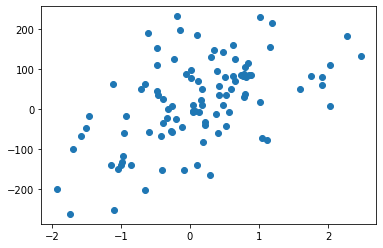

In [328]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],y)
# Your code here

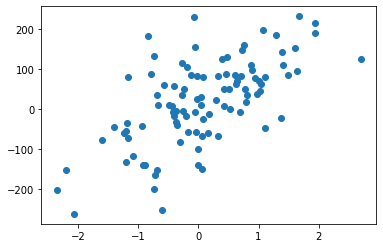

In [329]:
plt.scatter(X[:,1],y)

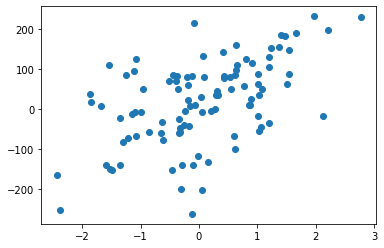

In [330]:
plt.scatter(X[:,2],y)

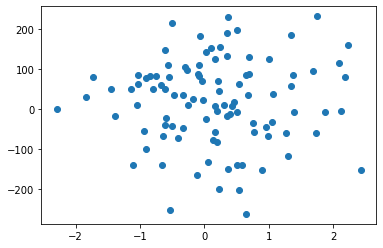

In [331]:
plt.scatter(X[:,3],y)

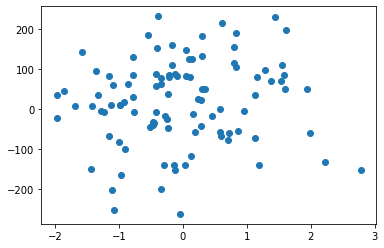

In [332]:
plt.scatter(X[:,4],y)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [333]:
import tensorflow as tf

# importing the sequential model
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

# importing the sequential model and adding dense layers
model = Sequential()

# kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
# Regularization basically adds the penalty as model complexity increases.
# Regularization parameter (lambda) penalizes all the parameters except intercept so that model generalizes the data and won’t overfit
model.add(Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))#Adding regularization
model.add(Dense(5, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))#Adding regularization
model.add(Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

# Summary of our model
model.summary()
# class SGD: Gradient descent (with momentum) optimizer.
opt = tf.keras.optimizers.SGD(learning_rate=0.001) #Used Stochastic gradient descent with a learning rate of 0.001
# List of metrics to be evaluated by the model during training and testing. 
# Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.
model.compile(optimizer=opt,
                loss='mse',
                metrics=['mse'])

#Keras provides the capability to register callbacks when training a deep learning model.
#One of the default callbacks that is registered when training all deep learning models is the History callback. 
#It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.
#The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned
# We now fit our model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),shuffle=True)

# Calculating loss and Mean Squared Error
loss,mse = model.evaluate(X_test, y_test, verbose=1)
print('MSE: %.3f' % mse)


Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_276 (Dense)           (None, 5)                 30        
                                                                 
 dense_277 (Dense)           (None, 5)                 30        
                                                                 
 dense_278 (Dense)           (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 211ms/step - loss: 11418.4863 - mse: 11416.1514 - val_loss: 11797.5723 - val_mse: 11795.2266
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 11381.4902 - mse: 11379.1396 - val_loss: 11764.4346 - val_mse: 11762.0537
Epoch 3/100
2/2 [===========

In [334]:
# Predicted value of our model
y_pred = model.predict(X_test)

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


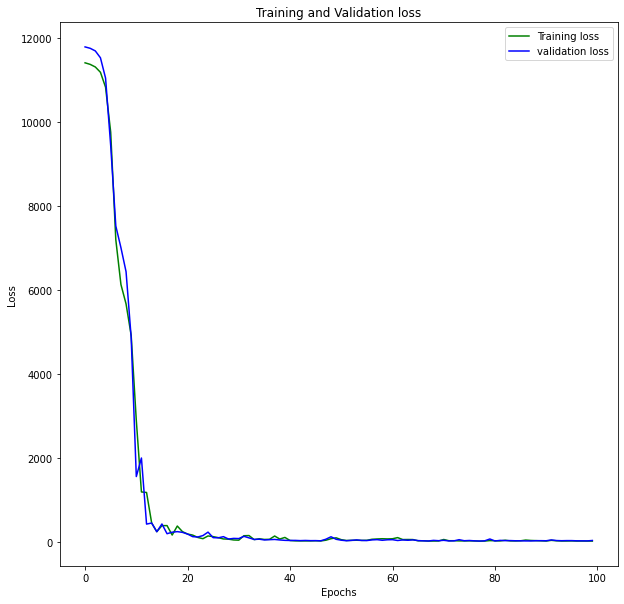

In [335]:
plt.figure(figsize=(10,10))

# list all data in history
print(history.history.keys())

loss_train = history.history['loss'] # training loss
loss_val = history.history['val_loss'] # validation loss
epochs = range(0,100) # since epochs=100

#Plotting training loss  and validation against epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [336]:
import numpy as np
def mean_squared_error(y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 20035.846584531457
Accuracy: 0.9954914516463528


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

# Custom model
```
Input of shape 5

Dense of shape 5

Dense of shape 6

Dense of shape 7

Dense of shape 8

Dense of shape 9

Dense of shape 1
```

In [337]:
from tensorflow.keras import layers
from tensorflow import keras

Model = keras.Sequential(
    [
        layers.Dense(5, activation="relu",input_shape=(5,)),
        layers.Dense(6, activation="relu"),
        layers.Dense(7, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(9, activation="relu"),
        layers.Dense(1),
    ]
)

Model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_279 (Dense)           (None, 5)                 30        
                                                                 
 dense_280 (Dense)           (None, 6)                 36        
                                                                 
 dense_281 (Dense)           (None, 7)                 49        
                                                                 
 dense_282 (Dense)           (None, 8)                 64        
                                                                 
 dense_283 (Dense)           (None, 9)                 81        
                                                                 
 dense_284 (Dense)           (None, 1)                 10        
                                                                 
Total params: 270
Trainable params: 270
Non-trainable

Used **Adam optimizer** and **Mean Squared Error Loss**

`learning_rate=0.005`

In [338]:
opt = keras.optimizers.Adam(learning_rate=0.005)
Model.compile(optimizer=opt,
                loss='mse',
                metrics=['mse'])

#Model Fitting

 Evaluating the Mean Squared Error and the loss 

In [339]:
history = Model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),shuffle=True)

# Calculating loss and Mean Squared Error
loss,mse = Model.evaluate(X_test, y_test, verbose=1)
print('MSE: %.3f' % mse)

Epoch 1/100
2/2 [==============================] - 1s 159ms/step - loss: 11427.6221 - mse: 11427.6221 - val_loss: 11826.8066 - val_mse: 11826.8066
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 11425.1660 - mse: 11425.1660 - val_loss: 11826.4512 - val_mse: 11826.4512
Epoch 3/100
2/2 [==============================] - 0s 38ms/step - loss: 11421.2070 - mse: 11421.2070 - val_loss: 11826.6904 - val_mse: 11826.6904
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 11417.7715 - mse: 11417.7715 - val_loss: 11824.8057 - val_mse: 11824.8057
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 11412.4922 - mse: 11412.4922 - val_loss: 11824.1260 - val_mse: 11824.1260
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 11407.2559 - mse: 11407.2559 - val_loss: 11822.7324 - val_mse: 11822.7324
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 11400.3027 - mse: 11400.3027 - val_loss: 11820.8984

In [340]:
# Predicted value of our model
y_pred = Model.predict(X_test)

#Plotting Loss

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


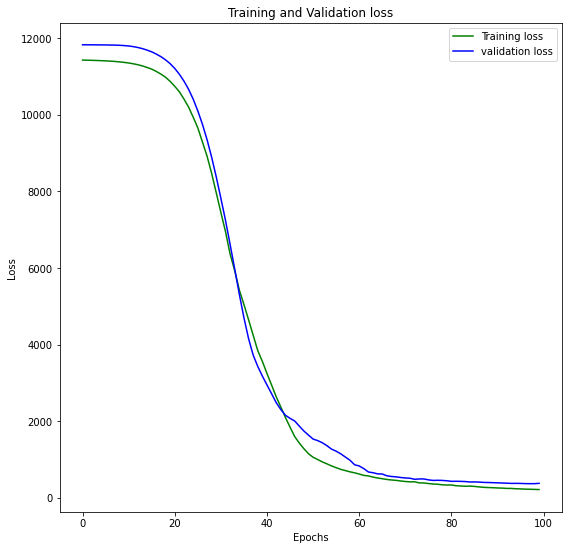

In [341]:
plt.figure(figsize=(9,9))

# list all data in history
print(history.history.keys())

loss_train = history.history['loss'] # training loss
loss_val = history.history['val_loss'] # validation loss
epochs = range(0,100) # since epochs=100

#Plotting training loss  and validation against epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()